# Classification Model Template

In [24]:
import joblib
df = joblib.load('finaldf.pkl')
df.head()


,id,cons_12m,cons_gas_12m,cons_last_month,has_gas,nb_prod_act,num_years_antig,pow_max,active_dur,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,0,1,3,180.000,1460.0,0.151367,0.0,0.0,44.266931,0.0,0.0,0
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,1,2,3,43.648,1096.0,0.151367,0.0,0.0,44.266931,0.0,0.0,1
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0,1,6,13.800,2566.0,0.151367,0.0,0.0,44.266931,0.0,0.0,0
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,0,1,6,13.856,2192.0,0.149626,0.0,0.0,44.266931,0.0,0.0,0
4,bba03439a292a1e166f80264c16191cb,1584,0,0,0,1,6,13.200,2192.0,0.149626,0.0,0.0,44.266931,0.0,0.0,0


In [25]:
df.drop(['id'], axis = 1, inplace = True)
df.head()

,cons_12m,cons_gas_12m,cons_last_month,has_gas,nb_prod_act,num_years_antig,pow_max,active_dur,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,309275,0,10025,0,1,3,180.000,1460.0,0.151367,0.0,0.0,44.266931,0.0,0.0,0
1,0,54946,0,1,2,3,43.648,1096.0,0.151367,0.0,0.0,44.266931,0.0,0.0,1
2,4660,0,0,0,1,6,13.800,2566.0,0.151367,0.0,0.0,44.266931,0.0,0.0,0
3,544,0,0,0,1,6,13.856,2192.0,0.149626,0.0,0.0,44.266931,0.0,0.0,0
4,1584,0,0,0,1,6,13.200,2192.0,0.149626,0.0,0.0,44.266931,0.0,0.0,0


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd


In [27]:
model_params = {
    'LogisticRegression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1, 5, 10]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {

        }
    },
    
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [2, 3]
        }
    }
}
X = df.drop(['churn'], axis=1)
y = df.churn

scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'],
                       cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': (clf.best_score_).round(2),
        'best_params': (clf.best_params_),
    })
result = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
result



,model,best_score,best_params
0,LogisticRegression,0.90,{'C': 1}
1,DecisionTree,0.83,{'criterion': 'gini'}
2,RandomForest,0.90,{'n_estimators': 10}
3,GaussianNB,0.23,{}
4,KNN,0.90,{'n_neighbors': 2}


/Users/jatindersinghmalhi/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


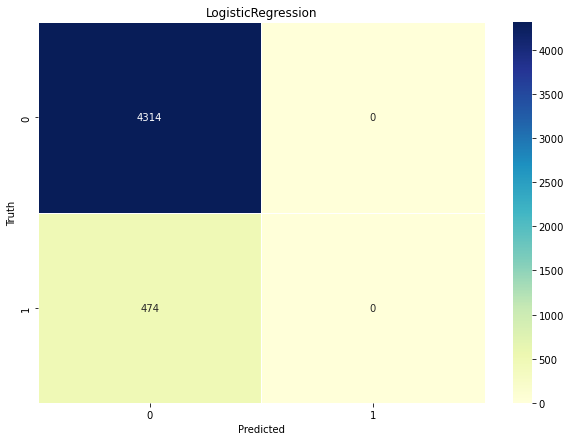

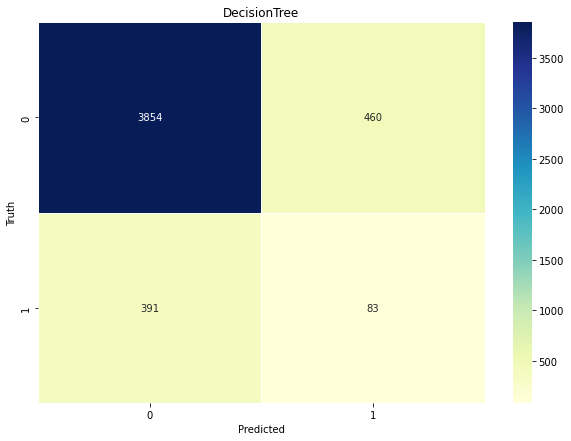

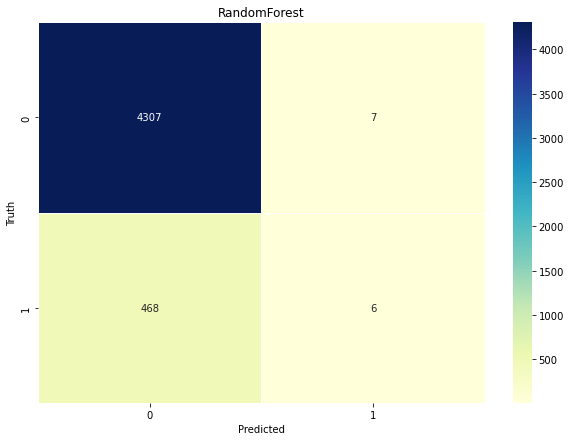

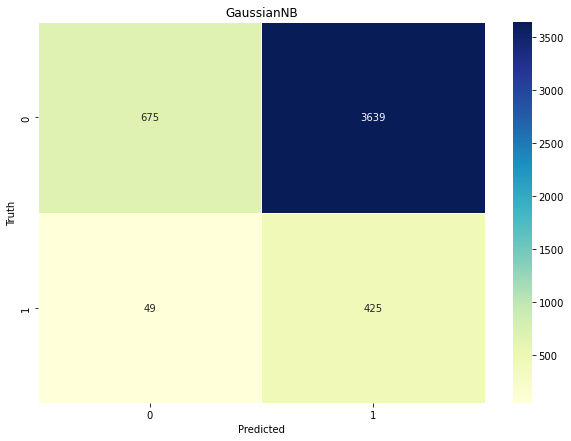

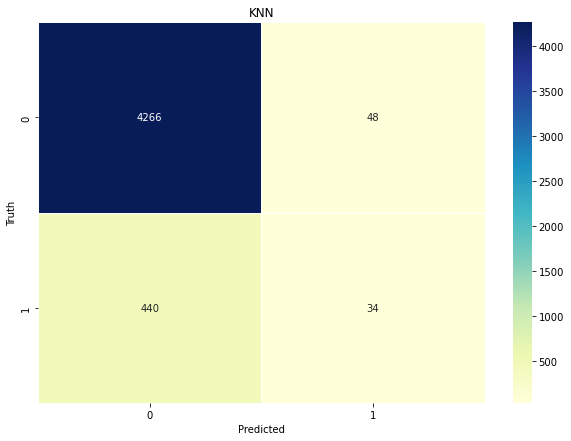

,model,accuracy,precision,recall
0,LogisticRegression,0.90,0.00,0.00
1,DecisionTree,0.82,0.15,0.18
2,RandomForest,0.90,0.46,0.01
3,GaussianNB,0.23,0.10,0.90
4,KNN,0.90,0.41,0.07


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from matplotlib import pyplot as plt
import seaborn as sns
sc =[]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

model_sel = {
    'LogisticRegression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto')
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier()
    },
    'RandomForest': {
        'model': RandomForestClassifier()
    },
    'GaussianNB': {
        'model': GaussianNB()
    },

    'KNN': {
        'model': KNeighborsClassifier()
    }
}
scor = []
for model_name, mp in model_sel.items():
    clf = mp['model']
    clf.fit(X_train, y_train)
    scor.append({
        'model': model_name,
        'accuracy': accuracy_score(y_test, clf.predict(X_test)).round(2),
        'precision': precision_score(y_test, clf.predict(X_test)).round(2),
        'recall': recall_score(y_test, clf.predict(X_test)).round(2),
    })
    cm = confusion_matrix(y_test, clf.predict(X_test)).round(2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', linewidths = .5)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(model_name)
    plt.show()
reslt = pd.DataFrame(scor, columns=['model','accuracy', 'precision', 'recall'])
reslt

